In [1]:
from traffic.core import Traffic
data = Traffic.from_file("../data/20170713-opensky.pkl")
data

,,count
icao24,callsign,
3803da,AIB01KV,11246
a184d7,N1972N,4362
020025,RAM653D,2492
484164,KLM88T,2275
020025,RAM650E,1833


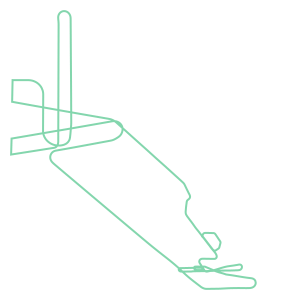

In [2]:
data['AIB01KV']

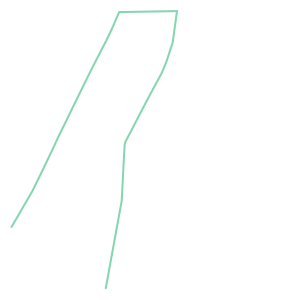

In [3]:
data['020025']

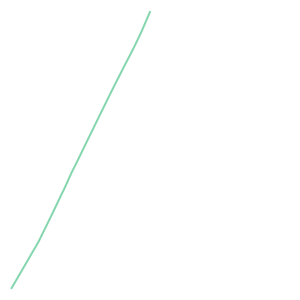

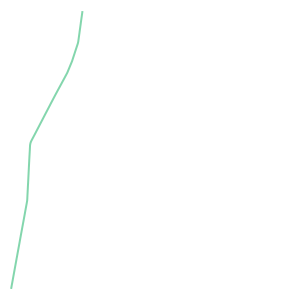

In [4]:
from IPython.display import display
for flight in data['020025'].split():
    display(flight)

In [5]:
data.query('timestamp == "2017-07-13 10:56.09"').data

,timestamp,icao24,latitude,longitude,ground_speed,track,vertical_rate,callsign,onground,alert,spi,squawk,baro_altitude,altitude,last_position,hour
112,2017-07-13 10:56:05,020025,43.631969,-1.612113,516.735463,29.442314,-64.0,RAM650E,False,False,False,1000,40050.0,41875.0,2017-07-13 10:56:00.286,1499932800


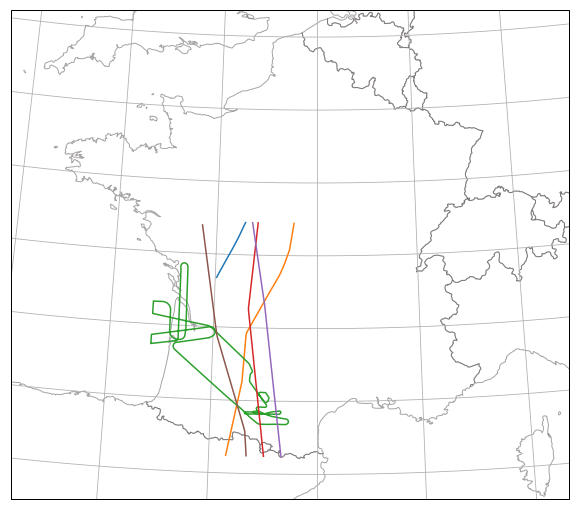

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

from traffic.drawing import Lambert93, countries, location

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=Lambert93())

ax.set_extent(location('France').extent)
ax.add_feature(countries())
ax.gridlines()

data.plot(ax)